# Table of Contents
 <p>

In [1]:
%matplotlib inline
import pandas as pd
import pandas_datareader
import datetime
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.pylab import style
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

style.use('ggplot')    
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

/Users/livedong/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
stockFile = '~/Documents/XXXX/ML实践&测试代码/tyd_samples/Python时间序列/Python时间序列/T10yr.csv'
stock = pd.read_csv(stockFile, index_col=0,parse_dates=[0]) #指定index值，制定第一列时间为索引；parse_dates进行时间格式的处理
stock.tail(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-18,1.577,1.604,1.556,1.587,0,1.587
2016-07-19,1.553,1.575,1.546,1.558,0,1.558
2016-07-20,1.568,1.596,1.566,1.580,0,1.580
2016-07-21,1.601,1.628,1.563,1.565,0,1.565
2016-07-22,1.585,1.599,1.544,1.570,0,1.570
2016-07-25,1.584,1.584,1.554,1.571,0,1.571
2016-07-26,1.559,1.587,1.549,1.563,0,1.563
2016-07-27,1.570,1.570,1.511,1.515,0,1.515
2016-07-28,1.525,1.535,1.493,1.511,0,1.511


In [3]:
stock_week = stock['Close'].resample('W-MON').mean() #选取某一列以收盘价作为预测值，进行重采样，具体按照每周进行以每周一开始，具体参数可以查一下
stock_train = stock_week['2000':'2015']

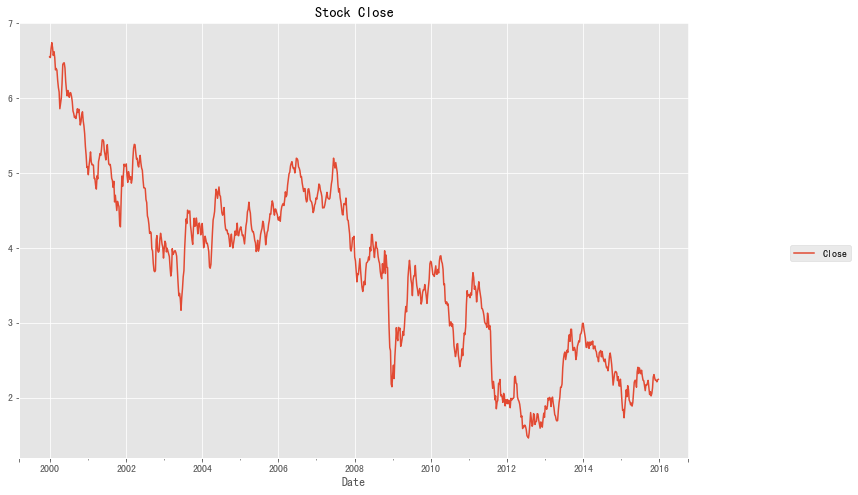

In [4]:
stock_train.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("Stock Close")
sns.despine()#浮动性较大，不够平稳需要进行差分

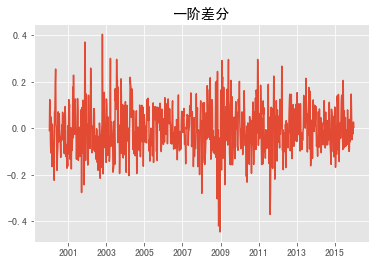

In [5]:
stock_diff = stock_train.diff()#计算差分值
stock_diff = stock_diff.dropna()

plt.figure()
plt.plot(stock_diff)
plt.title('一阶差分')
plt.show()

/Users/livedong/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


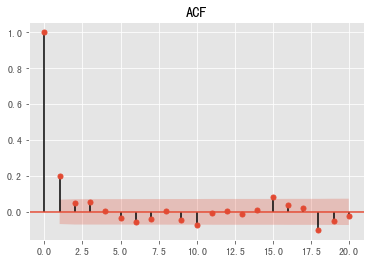

In [6]:
acf = plot_acf(stock_diff, lags=20)
plt.title("ACF")
acf.show() #差分过后ACF的q值在1阶过后已经都落在置信区间内了

/Users/livedong/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


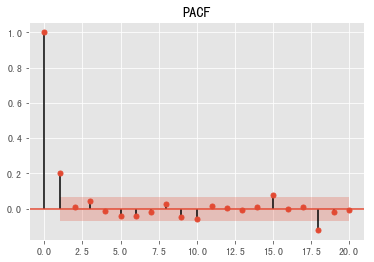

In [7]:
pacf = plot_pacf(stock_diff, lags=20)
plt.title("PACF")
pacf.show() #还可以看AIC和BIC的指标进行验证 一会儿重新复习一下 画上热力图

In [64]:
model = ARIMA(stock_train, order=(1, 0, 0))#order是进行pdq的值入参d为1阶差分；同时确定时间单位

In [65]:
result = model.fit()
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  835
Model:                     ARMA(1, 0)   Log Likelihood                 700.818
Method:                       css-mle   S.D. of innovations              0.104
Date:                Sat, 03 Nov 2018   AIC                          -1395.636
Time:                        12:08:42   BIC                          -1381.454
Sample:                    01-03-2000   HQIC                         -1390.199
                         - 12-28-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.0852      1.257      3.250      0.001       1.621       6.549
ar.L1.Close     0.9981      0.002    500.219      0.000       0.994       1.002
                                    Roots       

In [80]:
pred = result.predict('20140609', '20180701',dynamic=False) #将起始时间和结束时间放进去，起始时间必须包含已有数据否则出错误
print (pred)

2014-06-09    2.481914
2014-06-16    2.601482
2014-06-23    2.615255
2014-06-30    2.630226
2014-07-07    2.546589
2014-07-14    2.616852
2014-07-21    2.545590
2014-07-28    2.507065
2014-08-04    2.482912
2014-08-11    2.516647
2014-08-18    2.446383
2014-08-25    2.400672
2014-09-01    2.408856
2014-09-08    2.360600
2014-09-15    2.444587
2014-09-22    2.556968
2014-09-29    2.597090
2014-10-06    2.531218
2014-10-13    2.447381
2014-10-20    2.323422
2014-10-27    2.169521
2014-11-03    2.251961
2014-11-10    2.322424
2014-11-17    2.350968
2014-11-24    2.348573
2014-12-01    2.330009
2014-12-08    2.230103
2014-12-15    2.282102
2014-12-22    2.160938
2014-12-29    2.155947
                ...   
2017-12-04    2.570665
2017-12-11    2.573601
2017-12-18    2.576531
2017-12-25    2.579456
2018-01-01    2.582375
2018-01-08    2.585288
2018-01-15    2.588196
2018-01-22    2.591098
2018-01-29    2.593994
2018-02-05    2.596885
2018-02-12    2.599770
2018-02-19    2.602650
2018-02-26 

In [18]:
pred['20170601':'20170710']

2017-06-05    1.655329
2017-06-12    1.650173
2017-06-19    1.645018
2017-06-26    1.639863
2017-07-03    1.634708
2017-07-10    1.629552
Freq: W-MON, dtype: float64

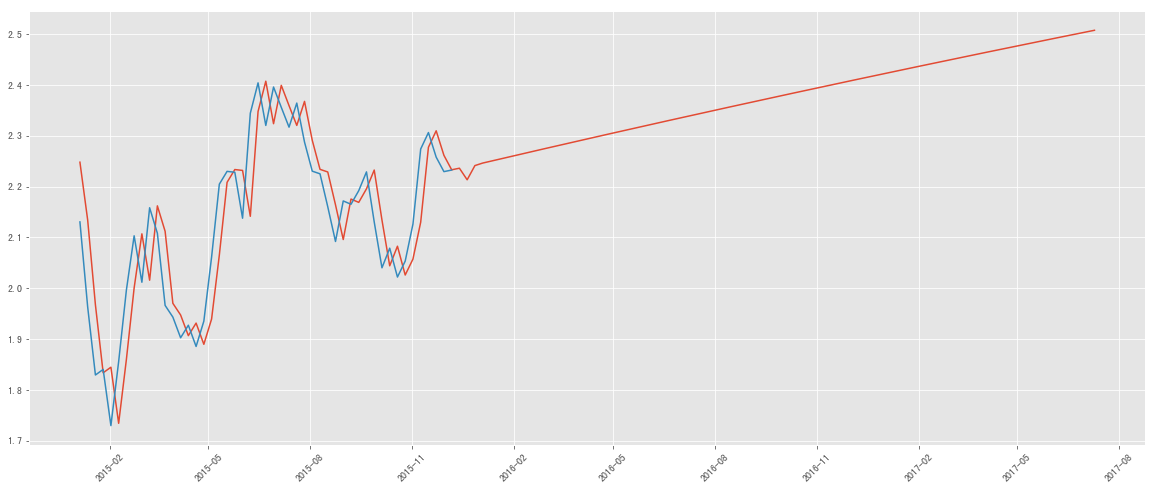

In [81]:
plt.figure(figsize=(20, 8))#图中标出了预测值
plt.xticks(rotation=45)
plt.plot(pred['20150101':'20170710'])
plt.plot(stock_train['20150101':'20151210'])

In [39]:
import statsmodels.api as sm

train_results = sm.tsa.arma_order_select_ic(stock_train, ic=['aic', 'bic'], trend='nc', max_ar=8, max_ma=8)
 
print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)

/Users/livedong/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/livedong/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/livedong/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/livedong/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/livedong/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed 

/Users/livedong/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/livedong/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/livedong/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/livedong/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/livedong/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimizat

AIC (4, 3)
BIC (2, 0)


/Users/livedong/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


/Users/livedong/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<Figure size 864x576 with 0 Axes>

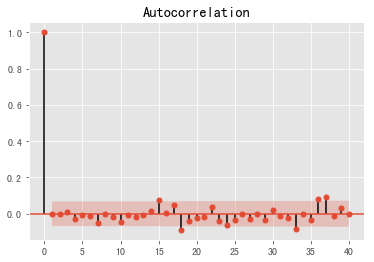

In [89]:
model = sm.tsa.ARIMA(stock_train, order=(4, 1, 3))
results = model.fit()
resid = results.resid #赋值
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40)
plt.show()

2015-06-01    2.240280
2015-06-08    2.126361
2015-06-15    2.390481
2015-06-22    2.417779
2015-06-29    2.318815
2015-07-06    2.418498
2015-07-13    2.349219
2015-07-20    2.317616
2015-07-27    2.376730
2015-08-03    2.275617
2015-08-10    2.226055
2015-08-17    2.225476
2015-08-24    2.150073
2015-08-31    2.083349
2015-09-07    2.189908
2015-09-14    2.166571
2015-09-21    2.206646
2015-09-28    2.241612
2015-10-05    2.117620
2015-10-12    2.029167
2015-10-19    2.087137
2015-10-26    2.012354
2015-11-02    2.067158
2015-11-09    2.143952
2015-11-16    2.310901
2015-11-23    2.322315
2015-11-30    2.260768
2015-12-07    2.230376
2015-12-14    2.236049
2015-12-21    2.209222
2015-12-28    2.248771
Freq: W-MON, dtype: float64


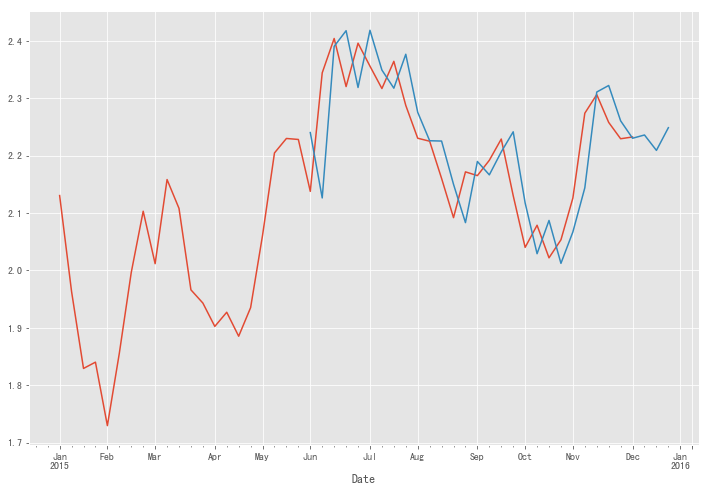

In [88]:
model = sm.tsa.ARIMA(stock_train,order=(4,0,0))
results = model.fit()
predict_sunspots = results.predict('20150601', '20160101',dynamic=False)
print(predict_sunspots)
fig, ax = plt.subplots(figsize=(12, 8))
ax = stock_train['20150101':'20151210'].plot(ax=ax)
predict_sunspots.plot(ax=ax)
plt.show()

In [73]:
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  834
Model:                 ARIMA(4, 1, 2)   Log Likelihood                 724.205
Method:                       css-mle   S.D. of innovations              0.102
Date:                Sat, 03 Nov 2018   AIC                          -1432.410
Time:                        12:16:39   BIC                          -1394.601
Sample:                    01-10-2000   HQIC                         -1417.914
                         - 12-28-2015                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0052      0.005     -1.118      0.264      -0.014       0.004
ar.L1.D.Close     0.2855      0.118      2.426      0.015       0.055       0.516
ar.L2.D.Close    -0.8825      0.092     

In [91]:
results.forecast(5)

(array([ 2.24230581,  2.2333625 ,  2.22592592,  2.22476391,  2.22210794]),
 array([ 0.10153374,  0.15842223,  0.20275388,  0.24162713,  0.27692711]),
 array([[ 2.04330334,  2.44130828],
        [ 1.92286063,  2.54386438],
        [ 1.82853562,  2.62331621],
        [ 1.75118343,  2.69834438],
        [ 1.67934078,  2.7648751 ]]))

In [90]:
from statsmodels.tsa.stattools import adfuller as ADF  #平稳性检测
from statsmodels.stats.diagnostic import acorr_ljungbox    #白噪声检验